# Lab 1: Vertebral Column Data Set

### Author Info
- Student Name: Sina Mahbobi
- USC ID: 9763428651

### Setup Environment

In [91]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import style
import pandas as pd
import seaborn as sns
import math

In [30]:
data_set_path = "~/Desktop/CSCI467/Lab_1/data/column_2C.dat"

var_set = [
    "pelvic_incidence",
    "pelvic_tint",
    "lumbar_lordosis_angle",
    "sacral_slope",
    "pelvic_radius",
    "grade_of_spondylolisthesis"
    
    
]

head_set = []
head_set.extend(var_set)
head_set.append("clazz")

df = pd.read_csv(data_set_path, sep = "\s+", header = None, names = head_set)
df['clazz'] = np.where(df['clazz'] == 'NO', 0, df['clazz'])
df['clazz'] = np.where(df['clazz'] == 'AB', 1, df['clazz'])

#### Preview Data

In [31]:

df.head()

,pelvic_incidence,pelvic_tint,lumbar_lordosis_angle,sacral_slope,pelvic_radius,grade_of_spondylolisthesis,clazz
0,63.03,22.55,39.61,40.48,98.67,-0.25,1
1,39.06,10.06,25.02,29.00,114.41,4.56,1
2,68.83,22.22,50.09,46.61,105.99,-3.53,1
3,69.30,24.65,44.31,44.64,101.87,11.21,1
4,49.71,9.65,28.32,40.06,108.17,7.92,1


In [32]:
df.tail()

,pelvic_incidence,pelvic_tint,lumbar_lordosis_angle,sacral_slope,pelvic_radius,grade_of_spondylolisthesis,clazz
305,47.90,13.62,36.00,34.29,117.45,-4.25,0
306,53.94,20.72,29.22,33.22,114.37,-0.42,0
307,61.45,22.69,46.17,38.75,125.67,-2.71,0
308,45.25,8.69,41.58,36.56,118.55,0.21,0
309,33.84,5.07,36.64,28.77,123.95,-0.20,0


## 1 (b)
#### i. Make scatterplots of the independent variables in the dataset. Use color to show Classes 0 and 1 

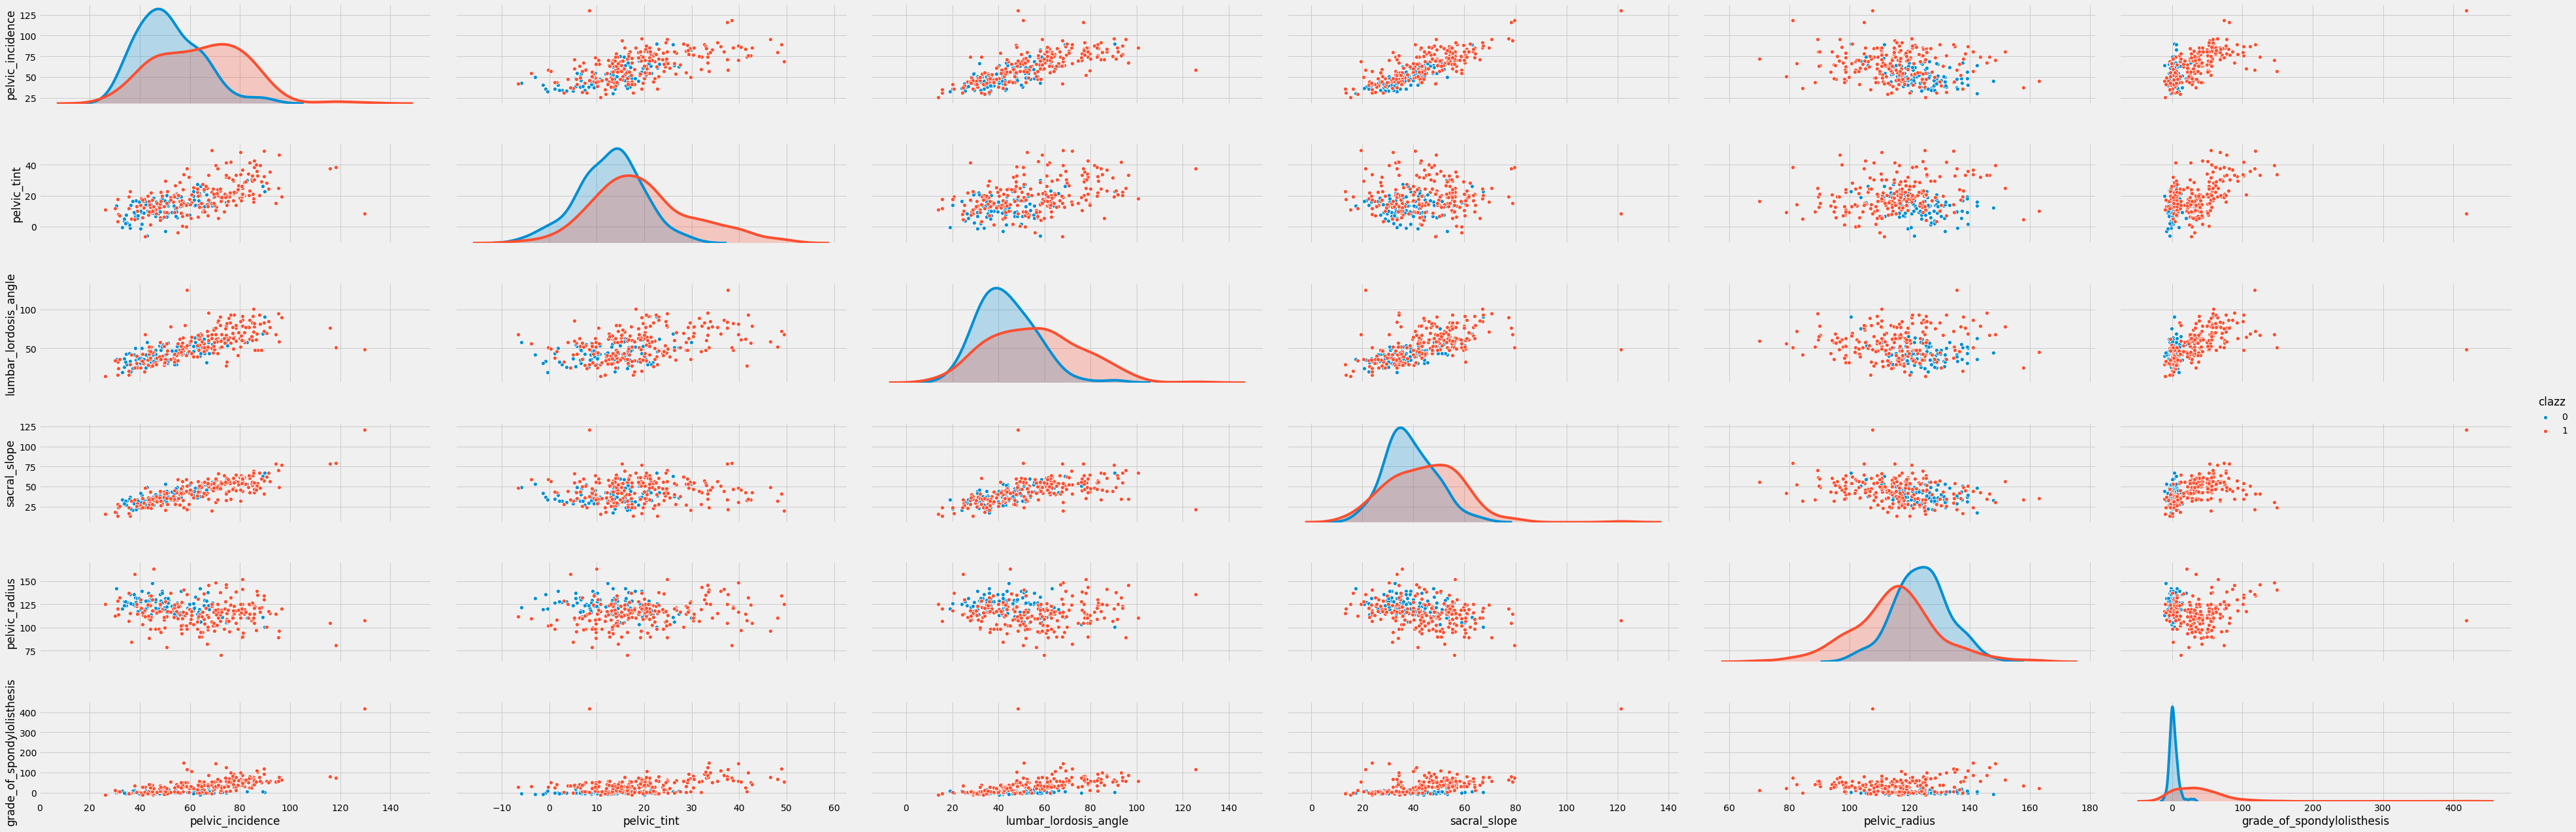

In [33]:

ax = sns.pairplot(vars= var_set, data = df, hue = 'clazz', height  = 3 , aspect = 3)

style.use('fivethirtyeight')
#plt.title("Relationship between the different classes in the dataset", y = 5)



## 1 (b)
#### ii. Make boxplots for each of the independent variables. Use color to show Classes 0 and 1

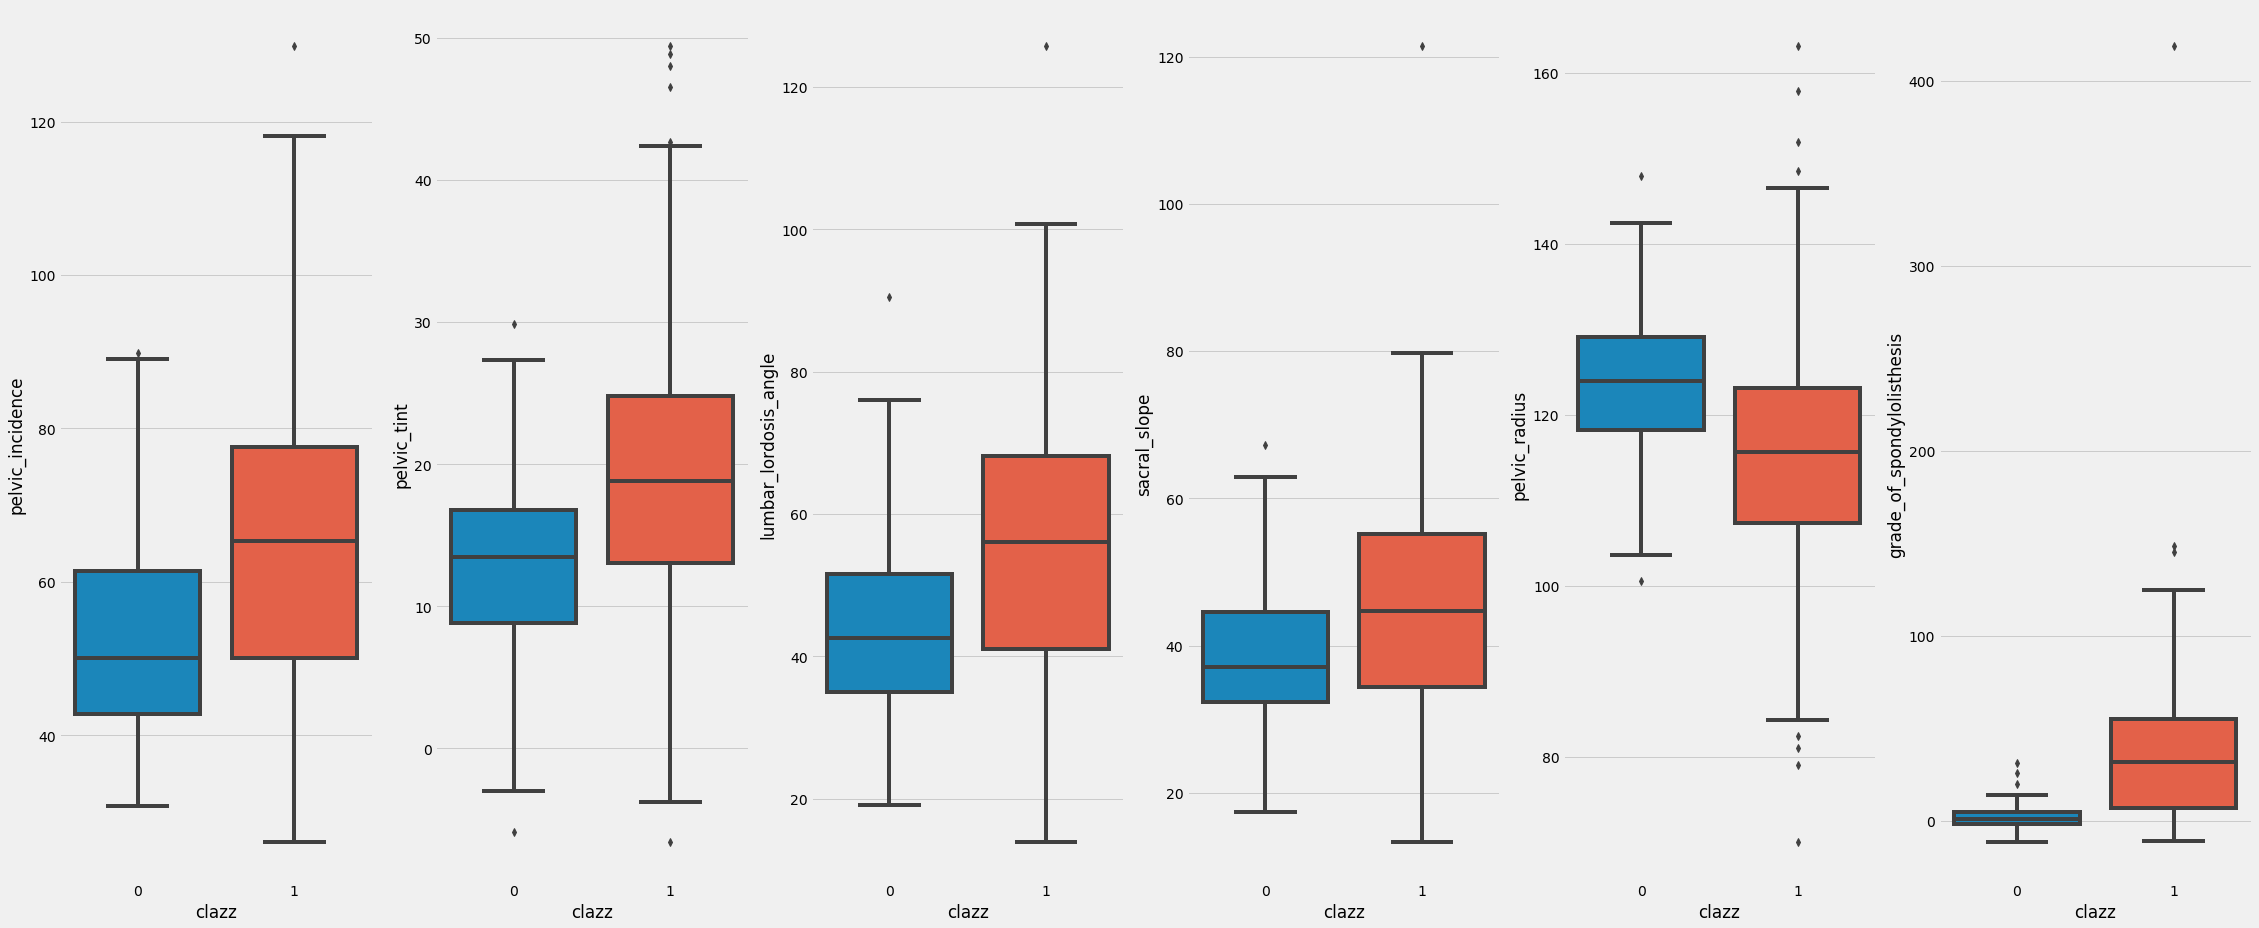

In [34]:
fig, axes = plt.subplots(1, 6)

ax = sns.boxplot(x="clazz", y="pelvic_incidence", data=df, orient='v', 
    ax=axes[0])
ax = sns.boxplot(x="clazz", y="pelvic_tint", data=df, orient='v', 
    ax=axes[1])
ax = sns.boxplot(x="clazz", y="lumbar_lordosis_angle", data=df, orient='v', 
    ax=axes[2])
ax = sns.boxplot(x="clazz", y="sacral_slope", data=df, orient='v', 
    ax=axes[3])
ax = sns.boxplot(x="clazz", y="pelvic_radius", data=df, orient='v', 
    ax=axes[4])
ax = sns.boxplot(x="clazz", y="grade_of_spondylolisthesis", data=df, orient='v', 
    ax=axes[5])
fig.set_figheight(15)
fig.set_figwidth(35)


## 1(b)

#### iii. Select the first 70 rows of Class 0 and the first 140 rows of Class 1 as the training set and the rest of the data as the test set.

In [35]:

first_class_0 = df[df['clazz'] == 0].index[0] #first occurrence of class = 0
#print(first_class_0)

# the two pieces of the training set
training_set_1 = df[first_class_0:first_class_0+70]  # rows 210-280, first 70 occurences of class 0
training_set_2 = df[0:140] # rows 0-140, first 140 rows of class 1 

# the two pieces of the test set
test_set_2 = df[140:210]  # remainder of the data for test set
test_set_1 = df[280:310]


frames = [training_set_1,training_set_2]  #concatenating to create training set
training_set = pd.concat(frames)
new_index =(np.arange(210))
training_set = training_set.set_index(new_index) #adjusting indexes after slicing original dataframe into new dataframe
X_train = training_set.iloc[:,[1,2,3,4,5]].values
y_train = training_set.iloc[:,6].values
y_train=y_train.astype('int')

frame = [test_set_1, test_set_2]
test_set = pd.concat(frame) # concatenating to create test set
X_test = test_set.iloc[:,[1,2,3,4,5]].values
y_test = test_set.iloc[:,6].values
y_test=y_test.astype('int')
#print(y_test)
#print(len(df))     
#print(training_set_1)
#print(training_set_2)
#print(training_set)
#print(len(test_set))

## 1(c)
### Classification using KNN on Vertebral Column Data Set

   ### Information on Analysis 
   
   - true positive rate (also known as sensitivity/recall) = true postive / (false negative + true positive)
   - true negative rate (specificity) = true negative / (false postive + true negative)
   - precision = true positive / (true positive + false positive)
   - f-score = (1+B^2)(precision * true positive rate)/(B^2*precision + true positive rate)
   
   
   
   
   - the count of true negatives is c[0][0] , 
   - false negatives is c[1][0] 
   - true positives is c[1][1]  
   - false positives is c[0][1] 
   - all from scikit learn user guide

#### 1(c) part i. and part ii. below

In [36]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)



# Fitting K-NN to the Training set
from sklearn.metrics import confusion_matrix
from sklearn.neighbors import KNeighborsClassifier

data_results = pd.DataFrame([])
Beta = 1
for k_value in range(208,0, -3):
    classifier = KNeighborsClassifier(n_neighbors = k_value, metric = 'minkowski', p = 2)
    #minkowski with p = 2 is the same as euclidian distance according to sklearn guide
    classifier.fit(X_train, y_train)

    # Training Error
    y_pred_train = classifier.predict(X_train)
    cm_train = confusion_matrix(y_train, y_pred_train) #training data confusion matrix
    
    TN_TRAIN = cm_train[0][0]
    FP_TRAIN = cm_train[0][1]
    FN_TRAIN = cm_train[1][0]
    TP_TRAIN = cm_train[1][1]

    TRAIN_ACC =  (TP_TRAIN + TN_TRAIN) / (TP_TRAIN + TN_TRAIN + FP_TRAIN + FN_TRAIN)
    TRAIN_ERR = 1 - TRAIN_ACC
    
    
    # Predicting the Test set results for different values of K
    y_pred_test = classifier.predict(X_test)
    cm_test = confusion_matrix(y_test, y_pred_test)
    
    
    
    TN_TEST = cm_test[0][0]
    FP_TEST = cm_test[0][1]
    FN_TEST = cm_test[1][0]
    TP_TEST = cm_test[1][1]
    
    TEST_ACC =  (TP_TEST + TN_TEST) / (TP_TEST + TN_TEST + FP_TEST + FN_TEST)
    TEST_ERR = 1 - TEST_ACC
    TPR = TP_TEST / (FN_TEST+TP_TEST)
    TNR = TN_TEST / (FP_TEST+TN_TEST)
    PRE = TP_TEST / (TP_TEST+FP_TEST)
    F_S = (1 + Beta*Beta)*(PRE*TPR)/(Beta*Beta*PRE + TPR)
    
    data_results = data_results.append(pd.DataFrame({'K Value': k_value,
        'True Positive Rate': TPR, 'True Negative Rate': TNR, 'Precision': PRE, 'F-score': F_S, 'Training Accuracy': TRAIN_ACC, 'Training Error': TRAIN_ERR, 'Test Accuracy': TEST_ACC, 'Test Error': TEST_ERR}, index=[0]), ignore_index=True)
    #print(k_value)
    #print(cm)

data_results

,K Value,True Positive Rate,True Negative Rate,Precision,F-score,Training Accuracy,Training Error,Test Accuracy,Test Error
0,208,1.000000,0.000000,0.700000,0.823529,0.666667,0.333333,0.70,0.30
1,205,1.000000,0.000000,0.700000,0.823529,0.666667,0.333333,0.70,0.30
2,202,1.000000,0.000000,0.700000,0.823529,0.666667,0.333333,0.70,0.30
3,199,1.000000,0.000000,0.700000,0.823529,0.666667,0.333333,0.70,0.30
4,196,1.000000,0.000000,0.700000,0.823529,0.666667,0.333333,0.70,0.30
5,193,1.000000,0.000000,0.700000,0.823529,0.666667,0.333333,0.70,0.30
6,190,1.000000,0.000000,0.700000,0.823529,0.666667,0.333333,0.70,0.30
7,187,1.000000,0.000000,0.700000,0.823529,0.666667,0.333333,0.70,0.30
8,184,1.000000,0.000000,0.700000,0.823529,0.666667,0.333333,0.70,0.30
9,181,1.000000,0.000000,0.700000,0.823529,0.666667,0.333333,0.70,0.30


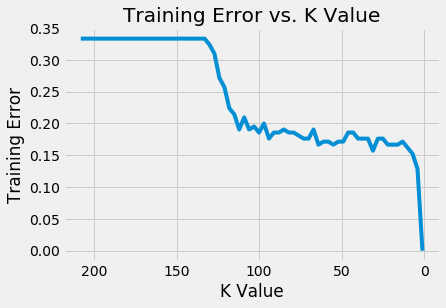

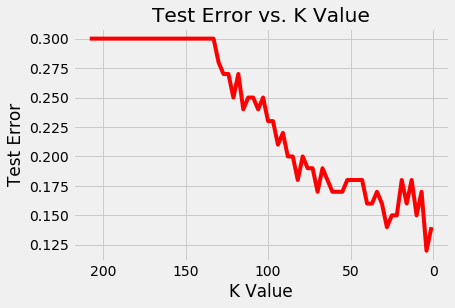

In [74]:
x = data_results['K Value']
y = data_results['Training Error']
plt.plot(x,y)
plt.gca().invert_xaxis()
plt.xlabel('K Value')
plt.ylabel('Training Error')
plt.title('Training Error vs. K Value')
plt.show()
x = data_results['K Value']
y = data_results['Test Error']
plt.plot(x,y, color = 'red')
plt.gca().invert_xaxis()
plt.xlabel('K Value')
plt.ylabel('Test Error')
plt.title('Test Error vs. K Value')
plt.show()

#### K = 4 is the most suitable K value for the following reasons:

- The mean of the True Positive Rate and the True Negative Rate is the largest, making it all around the best predictor of both classes
- It has the greatest level of precision on this training set, at around 89%
- It has the highest F-score, which is the harmonic mean of precision and true positive rate.
- It has the highest training and test accuracy (least training and test error)


### 1(c) part iii.

In [82]:

first_class_1 = training_set[training_set['clazz'] == 1].index[0] #first occurrence of class = 1
#print(first_class_1) 

#Training Data
training_set_1_k = df[first_class_0:first_class_0+70]  # rows 210-280, first 70 occurences of class 0
training_set_2_k = df[0:140] # rows 0-140, first 140 rows of class 1 

frames = [training_set_1_k,training_set_2_k]  #concatenating to create training set
training_set_k = pd.concat(frames)
new_index =(np.arange(210))
training_set_k = training_set_k.set_index(new_index) #adjusting indexes after slicing original dataframe into new dataframe
first_class_1 = training_set_k[training_set_k['clazz'] == 1].index[0] #first occurrence of class = 1


#Test Data 
# the two pieces of the test set
test_set_2_k = df[140:210]  # remainder of the data for test set
test_set_1_k = df[280:310]
frame_k = [test_set_1_k, test_set_2_k]
test_set_k = pd.concat(frame) # concatenating to create test set
X_test_k = test_set_k.iloc[:,[1,2,3,4,5]].values
y_test_k = test_set_k.iloc[:,6].values
y_test_k = y_test_k.astype('int')

N_K_data_results = pd.DataFrame([])
k_errors = dict()
for N in range(10,211, 10):
    train_set_1 = training_set_k[0:int(N/3)] # selects first [N/3] rows of Class 0
    train_set_2 = training_set_k[first_class_1:first_class_1 + int(2*N/3)] # selects N - [N/3] rows of class 1
    frames = [train_set_1,train_set_2]  
    train_set_k = pd.concat(frames) #concatenating to create training set for each value of N
    
    X_train = train_set_k.iloc[:,[1,2,3,4,5]].values  #splits independent and dependent variables of training data
    y_train_K = train_set_k.iloc[:,[6]].values
    y_train_K=y_train_K.astype('int')
    #print(X_train)
    #print(y_train)
    #Feature Scaling
    
    sc = StandardScaler()
    X_train_K = sc.fit_transform(X_train)
    X_test_K = sc.transform(X_test_k)
    
    #print(X_test)
    #print(y_test)
    for k in range(1,N,3):
        

        classifier = KNeighborsClassifier(n_neighbors = k, metric = 'minkowski', p = 2)
        
        #minkowski with p = 2 is the same as euclidian distance according to sklearn guide
        
        classifier.fit(X_train_K, y_train_K.ravel()) 
        
        # Predicting the Test set results for different values of K
        y_pred_test_K = classifier.predict(X_test_K)
        
        #print(y_pred_test)
        cm_test_K = confusion_matrix(y_test_k, y_pred_test_K)
        K_TN_TEST = cm_test_K[0][0]
        K_FP_TEST = cm_test_K[0][1]
        K_FN_TEST = cm_test_K[1][0]
        K_TP_TEST = cm_test_K[1][1]
    
        K_TEST_ACC =  (K_TP_TEST + K_TN_TEST) / (K_TP_TEST + K_TN_TEST + K_FP_TEST + K_FN_TEST)
        K_TEST_ERR = 1 - K_TEST_ACC
        
        #print(K_TEST_ERR)
        k_errors[k] = K_TEST_ERR #dictionary stores every k error for each n 
        
    
    k_optimal = min(k_errors,key = k_errors.get) # get the k value with the minimum error for each N from dictionary
    #
    min_error = k_errors[k_optimal] # the minimum error at that k value for each N
    N_K_data_results = N_K_data_results.append(pd.DataFrame({'N Value': N,
        'Optimal K': k_optimal, 'Test Error Rate at Optimal K': min_error}, index=[0]), ignore_index=True)

    
    
#print(N)
#print(x_train)
#print(k_errors)
euclidian_results = N_K_data_results    
#print(cm_test)    
#print(training_set_k)   
euclidian_results    
    
    

,N Value,Optimal K,Test Error Rate at Optimal K
0,10,1,0.18
1,20,1,0.19
2,30,1,0.17
3,40,13,0.24
4,50,4,0.25
5,60,4,0.20
6,70,4,0.19
7,80,7,0.22
8,90,7,0.22
9,100,49,0.27


#### Above is the table showing the optimal K at each value of N, with K being incremented by 3 every for all K less than or equal to N

- For some reason, I had to create duplicate training/test data sets with different variable names for this to work properly.
- Using the test data set from the previous section (even though it's the same test data set I need in this section caused issues with the nested for loop.

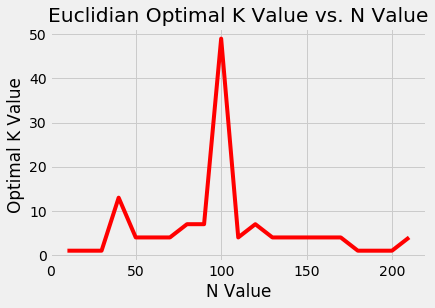

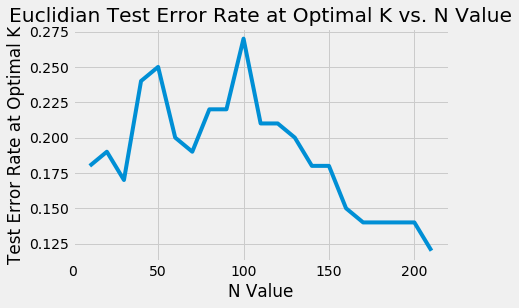

In [84]:
x = euclidian_results['N Value']
y = euclidian_results['Optimal K']
plt.plot(x,y, color = 'red')
plt.xlabel('N Value')
plt.ylabel('Optimal K Value')
plt.title('Euclidian Optimal K Value vs. N Value')
plt.show()

x = euclidian_results['N Value']
y = euclidian_results['Test Error Rate at Optimal K']
plt.plot(x,y)
plt.xlabel('N Value')
plt.ylabel('Test Error Rate at Optimal K')
plt.title('Euclidian Test Error Rate at Optimal K vs. N Value')
plt.show()

### 1d. section i. part A: Repeat 1c but use Manhattan Distance (p = 1) 
### Extra Credit

In [87]:

first_class_1 = training_set[training_set['clazz'] == 1].index[0] #first occurrence of class = 1
#print(first_class_1) 

#Training Data
training_set_1_k = df[first_class_0:first_class_0+70]  # rows 210-280, first 70 occurences of class 0
training_set_2_k = df[0:140] # rows 0-140, first 140 rows of class 1 

frames = [training_set_1_k,training_set_2_k]  #concatenating to create training set
training_set_k = pd.concat(frames)
new_index =(np.arange(210))
training_set_k = training_set_k.set_index(new_index) #adjusting indexes after slicing original dataframe into new dataframe
first_class_1 = training_set_k[training_set_k['clazz'] == 1].index[0] #first occurrence of class = 1


#Test Data 
# the two pieces of the test set
test_set_2_k = df[140:210]  # remainder of the data for test set
test_set_1_k = df[280:310]
frame_k = [test_set_1_k, test_set_2_k]
test_set_k = pd.concat(frame) # concatenating to create test set
X_test_k = test_set_k.iloc[:,[1,2,3,4,5]].values
y_test_k = test_set_k.iloc[:,6].values
y_test_k = y_test_k.astype('int')

N_K_data_results = pd.DataFrame([])
k_errors = dict()
for N in range(10,211, 10):
    train_set_1 = training_set_k[0:int(N/3)] # selects first [N/3] rows of Class 0
    train_set_2 = training_set_k[first_class_1:first_class_1 + int(2*N/3)] # selects N - [N/3] rows of class 1
    frames = [train_set_1,train_set_2]  
    train_set_k = pd.concat(frames) #concatenating to create training set for each value of N
    
    X_train = train_set_k.iloc[:,[1,2,3,4,5]].values  #splits independent and dependent variables of training data
    y_train_K = train_set_k.iloc[:,[6]].values
    y_train_K=y_train_K.astype('int')
    #print(X_train)
    #print(y_train)
    #Feature Scaling
    
    sc = StandardScaler()
    X_train_K = sc.fit_transform(X_train)
    X_test_K = sc.transform(X_test_k)
    
    #print(X_test)
    #print(y_test)
    for k in range(1,N,3):
        

        classifier = KNeighborsClassifier(n_neighbors = k, metric = 'minkowski', p = 1)
        
        #minkowski with p = 1 is the same as manhattan distance according to sklearn guide
        
        classifier.fit(X_train_K, y_train_K.ravel()) 
        
        # Predicting the Test set results for different values of K
        y_pred_test_K = classifier.predict(X_test_K)
        
        #print(y_pred_test)
        cm_test_K = confusion_matrix(y_test_k, y_pred_test_K)
        K_TN_TEST = cm_test_K[0][0]
        K_FP_TEST = cm_test_K[0][1]
        K_FN_TEST = cm_test_K[1][0]
        K_TP_TEST = cm_test_K[1][1]
    
        K_TEST_ACC =  (K_TP_TEST + K_TN_TEST) / (K_TP_TEST + K_TN_TEST + K_FP_TEST + K_FN_TEST)
        K_TEST_ERR = 1 - K_TEST_ACC
        
        #print(K_TEST_ERR)
        k_errors[k] = K_TEST_ERR #dictionary stores every k error for each n 
        
    
    k_optimal = min(k_errors,key = k_errors.get) # get the k value with the minimum error for each N from dictionary
    #
    min_error = k_errors[k_optimal] # the minimum error at that k value for each N
    N_K_data_results = N_K_data_results.append(pd.DataFrame({'N Value': N,
        'Optimal K': k_optimal, 'Test Error Rate at Optimal K': min_error}, index=[0]), ignore_index=True)

    
    
#print(N)
#print(x_train)
#print(k_errors)
manhattan_results = N_K_data_results    
#print(cm_test)    
#print(training_set_k)   
manhattan_results    
    
    

,N Value,Optimal K,Test Error Rate at Optimal K
0,10,1,0.27
1,20,4,0.17
2,30,1,0.23
3,40,7,0.26
4,50,19,0.30
5,60,28,0.29
6,70,22,0.29
7,80,31,0.29
8,90,37,0.30
9,100,49,0.28


#### Above is the table showing the optimal K at each value of N for Manhattan Distance, with K being incremented by 3 every for all K less than or equal to N
- The overall best K value is K = 4
- Like the previous section, for some reason, I had to create duplicate training/test data sets with different variable names for this to work properly.
- Using the test data set from the previous section (even though it's the same test data set I need in this section caused issues with the nested for loop.
- I hope to make sure this does not occur again in the next lab.

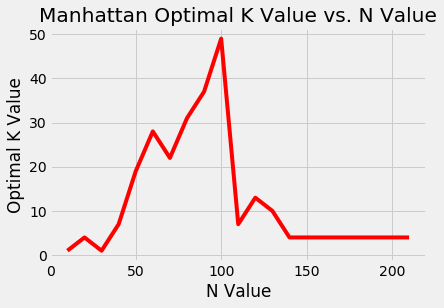

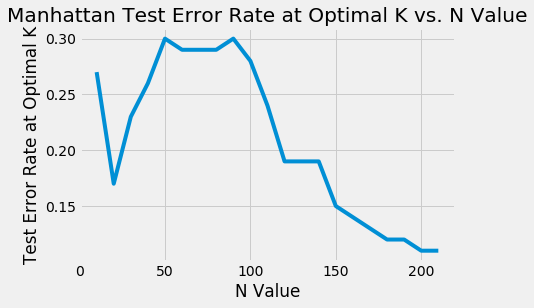

In [88]:
x = manhattan_results['N Value']
y = manhattan_results['Optimal K']
plt.plot(x,y, color = 'red')
plt.xlabel('N Value')
plt.ylabel('Optimal K Value')
plt.title('Manhattan Optimal K Value vs. N Value')
plt.show()

x = manhattan_results['N Value']
y = manhattan_results['Test Error Rate at Optimal K']
plt.plot(x,y)
plt.xlabel('N Value')
plt.ylabel('Test Error Rate at Optimal K')
plt.title('Manhattan Test Error Rate at Optimal K vs. N Value')
plt.show()

#### 1d. part i. section B: With log10(p). In this case, use the k you found for the Manhattan distance in 1(d)iA. What is the best log10(p)? (Extra Credit)

- This is not possible, as for the minkowski distance the value of p has to be greater than or equal to 1

### 1d. part iii. Use the Chebyshev Distance
- p approaches infinity

In [107]:

first_class_1 = training_set[training_set['clazz'] == 1].index[0] #first occurrence of class = 1
#print(first_class_1) 

#Training Data
training_set_1_k = df[first_class_0:first_class_0+70]  # rows 210-280, first 70 occurences of class 0
training_set_2_k = df[0:140] # rows 0-140, first 140 rows of class 1 

frames = [training_set_1_k,training_set_2_k]  #concatenating to create training set
training_set_k = pd.concat(frames)
new_index =(np.arange(210))
training_set_k = training_set_k.set_index(new_index) #adjusting indexes after slicing original dataframe into new dataframe
first_class_1 = training_set_k[training_set_k['clazz'] == 1].index[0] #first occurrence of class = 1


#Test Data 
# the two pieces of the test set
test_set_2_k = df[140:210]  # remainder of the data for test set
test_set_1_k = df[280:310]
frame_k = [test_set_1_k, test_set_2_k]
test_set_k = pd.concat(frame) # concatenating to create test set
X_test_k = test_set_k.iloc[:,[1,2,3,4,5]].values
y_test_k = test_set_k.iloc[:,6].values
y_test_k = y_test_k.astype('int')

N_K_data_results = pd.DataFrame([])
k_errors = dict()
for N in range(10,211, 10):
    train_set_1 = training_set_k[0:int(N/3)] # selects first [N/3] rows of Class 0
    train_set_2 = training_set_k[first_class_1:first_class_1 + int(2*N/3)] # selects N - [N/3] rows of class 1
    frames = [train_set_1,train_set_2]  
    train_set_k = pd.concat(frames) #concatenating to create training set for each value of N
    
    X_train = train_set_k.iloc[:,[1,2,3,4,5]].values  #splits independent and dependent variables of training data
    y_train_K = train_set_k.iloc[:,[6]].values
    y_train_K=y_train_K.astype('int')
    #print(X_train)
    #print(y_train)
    #Feature Scaling
    
    sc = StandardScaler()
    X_train_K = sc.fit_transform(X_train)
    X_test_K = sc.transform(X_test_k)
    
    #print(X_test)
    #print(y_test)
    for k in range(1,N,5):
        
       
        classifier = KNeighborsClassifier(n_neighbors = k, metric = 'chebyshev')
        
        
        
        classifier.fit(X_train_K, y_train_K.ravel()) 
        
        # Predicting the Test set results for different values of K
        y_pred_test_K = classifier.predict(X_test_K)
        
        #print(y_pred_test)
        cm_test_K = confusion_matrix(y_test_k, y_pred_test_K)
        K_TN_TEST = cm_test_K[0][0]
        K_FP_TEST = cm_test_K[0][1]
        K_FN_TEST = cm_test_K[1][0]
        K_TP_TEST = cm_test_K[1][1]
    
        K_TEST_ACC =  (K_TP_TEST + K_TN_TEST) / (K_TP_TEST + K_TN_TEST + K_FP_TEST + K_FN_TEST)
        K_TEST_ERR = 1 - K_TEST_ACC
        
        #print(K_TEST_ERR)
        k_errors[k] = K_TEST_ERR #dictionary stores every k error for each n 
        
    
    k_optimal = min(k_errors,key = k_errors.get) # get the k value with the minimum error for each N from dictionary
    #
    min_error = k_errors[k_optimal] # the minimum error at that k value for each N
    N_K_data_results = N_K_data_results.append(pd.DataFrame({'N Value': N,
        'Optimal K': k_optimal, 'Test Error Rate at Optimal K': min_error}, index=[0]), ignore_index=True)

    
    
#print(N)
#print(x_train)
#print(k_errors)
chebyshev_results = N_K_data_results    
#print(cm_test)    
#print(training_set_k)   
chebyshev_results    
    
    

,N Value,Optimal K,Test Error Rate at Optimal K
0,10,1,0.19
1,20,1,0.19
2,30,1,0.20
3,40,6,0.24
4,50,6,0.19
5,60,6,0.17
6,70,6,0.16
7,80,6,0.15
8,90,6,0.14
9,100,6,0.26


### The table above shows the optimal K for each value of N.

- The optimal K with the Chebyshev distance is 6, when K is incremented by 5 at each iteration.

### 1d. part ii. Mahalanobis Distance

In [120]:

first_class_1 = training_set[training_set['clazz'] == 1].index[0] #first occurrence of class = 1
#print(first_class_1) 

#Training Data
training_set_1_k = df[first_class_0:first_class_0+70]  # rows 210-280, first 70 occurences of class 0
training_set_2_k = df[0:140] # rows 0-140, first 140 rows of class 1 

frames = [training_set_1_k,training_set_2_k]  #concatenating to create training set
training_set_k = pd.concat(frames)
new_index =(np.arange(210))
training_set_k = training_set_k.set_index(new_index) #adjusting indexes after slicing original dataframe into new dataframe
first_class_1 = training_set_k[training_set_k['clazz'] == 1].index[0] #first occurrence of class = 1


#Test Data 
# the two pieces of the test set
test_set_2_k = df[140:210]  # remainder of the data for test set
test_set_1_k = df[280:310]
frame_k = [test_set_1_k, test_set_2_k]
test_set_k = pd.concat(frame) # concatenating to create test set
X_test_k = test_set_k.iloc[:,[1,2,3,4,5]].values
y_test_k = test_set_k.iloc[:,6].values
y_test_k = y_test_k.astype('int')

N_K_data_results = pd.DataFrame([])
k_errors = dict()
for N in range(10,211, 10):
    train_set_1 = training_set_k[0:int(N/3)] # selects first [N/3] rows of Class 0
    train_set_2 = training_set_k[first_class_1:first_class_1 + int(2*N/3)] # selects N - [N/3] rows of class 1
    frames = [train_set_1,train_set_2]  
    train_set_k = pd.concat(frames) #concatenating to create training set for each value of N
    
    X_train = train_set_k.iloc[:,[1,2,3,4,5]].values  #splits independent and dependent variables of training data
    y_train_K = train_set_k.iloc[:,[6]].values
    y_train_K=y_train_K.astype('int')
    #print(X_train)
    #print(y_train)
    #Feature Scaling
    
    sc = StandardScaler()
    X_train_K = sc.fit_transform(X_train)
    X_test_K = sc.transform(X_test_k)
    
    #print(X_test)
    #print(y_test)
    for k in range(1,N,5):
        
       
        classifier = KNeighborsClassifier(n_neighbors = k, metric = 'mahalanobis',  metric_params={'V': np.cov(X_train_K)})
        
        
        
        classifier.fit(X_train_K, y_train_K.ravel()) 
        
        # Predicting the Test set results for different values of K
        y_pred_test_K = classifier.predict(X_test_K)
        
        #print(y_pred_test)
        cm_test_K = confusion_matrix(y_test_k, y_pred_test_K)
        K_TN_TEST = cm_test_K[0][0]
        K_FP_TEST = cm_test_K[0][1]
        K_FN_TEST = cm_test_K[1][0]
        K_TP_TEST = cm_test_K[1][1]
    
        K_TEST_ACC =  (K_TP_TEST + K_TN_TEST) / (K_TP_TEST + K_TN_TEST + K_FP_TEST + K_FN_TEST)
        K_TEST_ERR = 1 - K_TEST_ACC
        
        #print(K_TEST_ERR)
        k_errors[k] = K_TEST_ERR #dictionary stores every k error for each n 
        
    
    k_optimal = min(k_errors,key = k_errors.get) # get the k value with the minimum error for each N from dictionary
    #
    min_error = k_errors[k_optimal] # the minimum error at that k value for each N
    N_K_data_results = N_K_data_results.append(pd.DataFrame({'N Value': N,
        'Optimal K': k_optimal, 'Test Error Rate at Optimal K': min_error}, index=[0]), ignore_index=True)

    
    
#print(N)
#print(x_train)
#print(k_errors)
mahalanobis_results = N_K_data_results    
#print(cm_test)    
#print(training_set_k)   
mahalanobis_results    
    
    

ValueError: Mahalanobis dist: size of V does not match

### I could not get Section 1d. Part II or Section 1e. to properly work

#### Section 1f

- the lowest training error seen in this assignment is 0 for when k = 1 on the training data. This is the result of overfitting to the training data